<a href="https://colab.research.google.com/github/shalini-03-03-2006/Codsoft_task2/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
import pandas as pd

data = pd.read_csv("IMDb Movies India.csv", encoding_errors='ignore')
print(data.head())
print(data)

                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

In [ ]:
print(data.columns)

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')


In [ ]:
data = data.dropna(subset=["Genre", "Director", "Rating"])
print(data)

                                     Name    Year Duration  \
1      #Gadhvi (He thought he was Gandhi)  (2019)  109 min   
3                                 #Yaaram  (2019)  110 min   
5                    ...Aur Pyaar Ho Gaya  (1997)  147 min   
6                               ...Yahaan  (2005)  142 min   
8                      ?: A Question Mark  (2012)   82 min   
...                                   ...     ...      ...   
15501                     Zulm Ki Hukumat  (1992)      NaN   
15503                     Zulm Ki Zanjeer  (1989)  125 min   
15504                 Zulm Ko Jala Doonga  (1988)      NaN   
15505                               Zulmi  (1999)  129 min   
15508                        Zulm-O-Sitam  (1998)  130 min   

                           Genre  Rating  Votes           Director  \
1                          Drama     7.0      8      Gaurav Bakshi   
3                Comedy, Romance     4.4     35         Ovais Khan   
5         Comedy, Drama, Musical     4.7    8

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# Load dataset
data = pd.read_csv("IMDb Movies India.csv", encoding='latin-1')

# Clean column names
data.columns = data.columns.str.strip()
print(data)

# Use only columns that exist
valid_cols = [col for col in ["Genre", "Director", "Actors", "Rating"] if col in data.columns]
data = data.dropna(subset=valid_cols)
print(data)

# Features (X) and Target (y)
X = data[[col for col in ["Genre", "Director", "Actors"] if col in data.columns]]
y = data["Rating"]

# Define preprocessing for categorical features
categorical_features = X.columns.tolist()
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Build pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
model.fit(X_train, y_train)

# Predict
predictions = model.predict(X_test)
print("Sample predictions:", predictions[:5])

                                     Name    Year Duration            Genre  \
0                                             NaN      NaN            Drama   
1      #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                             #Homecoming  (2021)   90 min   Drama, Musical   
3                                 #Yaaram  (2019)  110 min  Comedy, Romance   
4                       ...And Once Again  (2010)  105 min            Drama   
...                                   ...     ...      ...              ...   
15504                 Zulm Ko Jala Doonga  (1988)      NaN           Action   
15505                               Zulmi  (1999)  129 min    Action, Drama   
15506                           Zulmi Raj  (2005)      NaN           Action   
15507                       Zulmi Shikari  (1988)      NaN           Action   
15508                        Zulm-O-Sitam  (1998)  130 min    Action, Drama   

       Rating Votes            Director           A

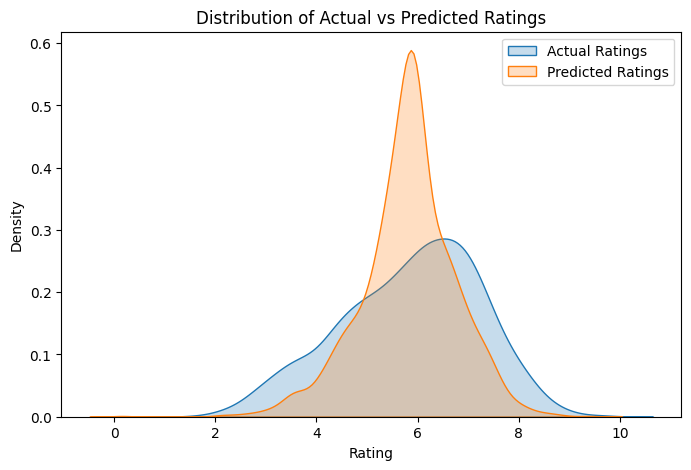

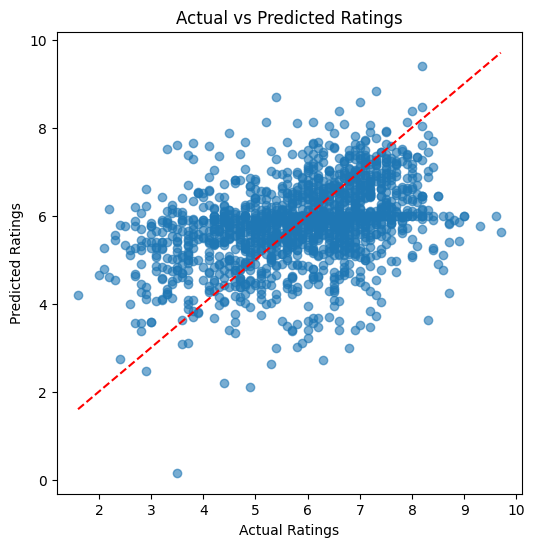

R² Score: 0.070
RMSE: 1.337


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Predictions
y_pred = model.predict(X_test)

# --- 1. Actual vs Predicted distribution ---
plt.figure(figsize=(8,5))
sns.kdeplot(y_test, label="Actual Ratings", fill=True)
sns.kdeplot(y_pred, label="Predicted Ratings", fill=True)
plt.legend()
plt.title("Distribution of Actual vs Predicted Ratings")
plt.xlabel("Rating")
plt.ylabel("Density")
plt.show()

# --- 2. Scatter Plot ---
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect line
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Ratings")
plt.show()

# --- 3. Metrics ---
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"R² Score: {r2:.3f}")
print(f"RMSE: {rmse:.3f}")